# Energy Consumption Data

## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#%matplotlib notebook
#%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [2]:
energy = pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\pjm_hourly_est.csv")

In [3]:
energy.head()

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,31-12-1998 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,31-12-1998 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,31-12-1998 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,31-12-1998 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,31-12-1998 05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


In [4]:

energy['Datetime'] = pd.to_datetime(energy['Datetime'])
#converting object type to datetime type
#creating month,date,year,hour columns
energy['Month']= energy['Datetime'].dt.month
energy['date'] = energy['Datetime'].dt.date
energy['year'] =energy['Datetime'].dt.year
energy['hour'] = energy['Datetime'].dt.hour

## Reading all the Csv Files 

In [5]:
AEP= pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\AEP_hourly.csv")

In [6]:
COMED = pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\COMED_hourly.csv")

In [7]:
DAYTON = pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\DAYTON_hourly.csv")

In [8]:
DEOK = pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\DEOK_hourly.csv")


In [9]:
DOM = pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\DOM_hourly.csv")

In [10]:
DUQ = pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\DUQ_hourly.csv")

In [11]:
EKPC = pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\EKPC_hourly.csv")

In [12]:
FE = pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\FE_hourly.csv")

In [13]:
NI = pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\NI_hourly.csv")

In [14]:
PJME = pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\PJME_hourly.csv")

In [15]:
PJMW = pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\PJMW_hourly.csv")

In [16]:
PJM_Load = pd.read_csv("C:\\Users\\Admin\\Desktop\\Shrawant\\Hourly Energy\\datasets\\PJM_Load_hourly.csv")

## Merging all the dataframes 

In [17]:
df = pd.merge(COMED, AEP, on='Datetime')
df.head()

,Datetime,COMED_MW,AEP_MW
0,31-12-2011 01:00,9970,13096
1,31-12-2011 02:00,9428,12608
2,31-12-2011 03:00,9059,12451
3,31-12-2011 04:00,8817,12338
4,31-12-2011 05:00,8743,12432


In [18]:
DAYTON1=DAYTON["Datetime"].str.split(" ", n = 1, expand = True) 

In [19]:
DAYTON['date']=DAYTON1[0]

In [20]:
DAYTON['time']=DAYTON1[1]

In [21]:
DAYTON.head()

,Datetime,DAYTON_MW,date,time
0,2004-12-31 01:00:00,1596.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,1517.0,2004-12-31,02:00:00
2,2004-12-31 03:00:00,1486.0,2004-12-31,03:00:00
3,2004-12-31 04:00:00,1469.0,2004-12-31,04:00:00
4,2004-12-31 05:00:00,1472.0,2004-12-31,05:00:00


In [22]:
DAYTON['date'] = pd.to_datetime(DAYTON['date'])
DAYTON['date'] = pd.to_datetime(DAYTON['date'],format='%d-%m-%Y').dt.strftime('%d-%m-%Y')
DAYTON['time'] = pd.to_datetime(DAYTON['time'],format='%H:%M:%S').dt.strftime('%H:%M')

In [23]:
del DAYTON['Datetime']

In [24]:
DAYTON['Datetime']=DAYTON['date']+' '+DAYTON['time']

In [25]:
del DAYTON['date']
del DAYTON['time']

In [26]:
df.dtypes

Datetime    object
COMED_MW     int64
AEP_MW       int64
dtype: object

In [27]:
df2 = pd.merge(df, DAYTON, on='Datetime')
df2.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW
0,31-12-2011 01:00,9970,13096,1560.0
1,31-12-2011 02:00,9428,12608,1505.0
2,31-12-2011 03:00,9059,12451,1460.0
3,31-12-2011 04:00,8817,12338,1462.0
4,31-12-2011 05:00,8743,12432,1456.0


In [28]:
df3 = pd.merge(df2, DEOK, on='Datetime')
df3.head()


,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW
0,31-12-2012 01:00,10445,15935,1824.0,2945
1,31-12-2012 02:00,9897,15645,1771.0,2868
2,31-12-2012 03:00,9538,15613,1760.0,2812
3,31-12-2012 04:00,9333,15618,1734.0,2812
4,31-12-2012 05:00,9275,15760,1757.0,2860


In [29]:
df4 = pd.merge(df3, DOM, on='Datetime')
df4.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW
0,31-12-2012 01:00,10445,15935,1824.0,2945,11570
1,31-12-2012 02:00,9897,15645,1771.0,2868,11462
2,31-12-2012 03:00,9538,15613,1760.0,2812,11548
3,31-12-2012 04:00,9333,15618,1734.0,2812,11811
4,31-12-2012 05:00,9275,15760,1757.0,2860,12232


In [30]:
df5 = pd.merge(df4, DUQ, on='Datetime')
df5.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW
0,31-12-2012 01:00,10445,15935,1824.0,2945,11570,1556
1,31-12-2012 02:00,9897,15645,1771.0,2868,11462,1509
2,31-12-2012 03:00,9538,15613,1760.0,2812,11548,1479
3,31-12-2012 04:00,9333,15618,1734.0,2812,11811,1468
4,31-12-2012 05:00,9275,15760,1757.0,2860,12232,1488


In [31]:
df6 = pd.merge(df5, EKPC, on='Datetime')
df6.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW
0,31-12-2013 01:00,11979,15128,1930.0,3065,10239,1563,1861
1,31-12-2013 02:00,11438,14886,1884.0,2970,9964,1498,1835
2,31-12-2013 03:00,11113,14831,1845.0,2917,9921,1469,1841
3,31-12-2013 04:00,10928,14873,1843.0,2910,9981,1461,1872
4,31-12-2013 05:00,10926,15001,1875.0,2958,10290,1481,1934


In [32]:
df7 = pd.merge(df6, FE, on='Datetime')
df7.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW
0,31-12-2013 01:00,11979,15128,1930.0,3065,10239,1563,1861,7459
1,31-12-2013 02:00,11438,14886,1884.0,2970,9964,1498,1835,7241
2,31-12-2013 03:00,11113,14831,1845.0,2917,9921,1469,1841,7115
3,31-12-2013 04:00,10928,14873,1843.0,2910,9981,1461,1872,7073
4,31-12-2013 05:00,10926,15001,1875.0,2958,10290,1481,1934,7156


In [33]:
df8 = pd.merge(df7, NI, on='Datetime')
df8.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW


In [34]:
df9 = pd.merge(df7, PJME, on='Datetime')
df9.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW
0,31-12-2013 01:00,11979,15128,1930.0,3065,10239,1563,1861,7459,30254
1,31-12-2013 02:00,11438,14886,1884.0,2970,9964,1498,1835,7241,29241
2,31-12-2013 03:00,11113,14831,1845.0,2917,9921,1469,1841,7115,28772
3,31-12-2013 04:00,10928,14873,1843.0,2910,9981,1461,1872,7073,28762
4,31-12-2013 05:00,10926,15001,1875.0,2958,10290,1481,1934,7156,29391


In [35]:
df10 = pd.merge(df9, PJMW, on='Datetime')
df10.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW
0,31-12-2013 01:00,11979,15128,1930.0,3065,10239,1563,1861,7459,30254,5840
1,31-12-2013 02:00,11438,14886,1884.0,2970,9964,1498,1835,7241,29241,5710
2,31-12-2013 03:00,11113,14831,1845.0,2917,9921,1469,1841,7115,28772,5617
3,31-12-2013 04:00,10928,14873,1843.0,2910,9981,1461,1872,7073,28762,5661
4,31-12-2013 05:00,10926,15001,1875.0,2958,10290,1481,1934,7156,29391,5732


In [36]:
df10.head()


,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW
0,31-12-2013 01:00,11979,15128,1930.0,3065,10239,1563,1861,7459,30254,5840
1,31-12-2013 02:00,11438,14886,1884.0,2970,9964,1498,1835,7241,29241,5710
2,31-12-2013 03:00,11113,14831,1845.0,2917,9921,1469,1841,7115,28772,5617
3,31-12-2013 04:00,10928,14873,1843.0,2910,9981,1461,1872,7073,28762,5661
4,31-12-2013 05:00,10926,15001,1875.0,2958,10290,1481,1934,7156,29391,5732


In [37]:
df10['Datetime'] = pd.to_datetime(df10['Datetime'],format='%d-%m-%Y %H:%M').dt.strftime('%Y-%d-%m %H:%M')

In [38]:
df10 = df10.sort_values(by='Datetime')

In [39]:
df10.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW
5111,2013-01-06 01:00,11378,13477,1682.0,2773,10150,1739,1166,7099,32085,4808
5112,2013-01-06 02:00,10584,12699,1568.0,2613,9406,1641,1098,6617,29778,4252
5113,2013-01-06 03:00,9973,12274,1514.0,2499,8910,1569,1036,6351,28145,4179
5114,2013-01-06 04:00,9451,11904,1467.0,2409,8551,1518,1023,6201,27031,4097
5115,2013-01-06 05:00,9184,11862,1456.0,2392,8413,1503,949,6157,26404,3861


In [40]:
df10['Datetime'] = pd.to_datetime(df10['Datetime'],format='%Y-%d-%m %H:%M').dt.strftime('%m-%d-%Y %H:%M')

In [41]:
df10['Datetime']= df10['Datetime'].astype(str)

In [42]:
df10.to_csv('final.csv')

## Cleaned Data

In [43]:
data = pd.read_csv("C:\\Users\\Admin\\Downloads\\dome.csv")

In [44]:
data.shape

(49421, 12)

In [45]:
del data['Unnamed: 0']

## Complete Data

In [46]:
data.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW
0,06-01-2013 01:00,11378,13477,1682.0,2773,10150,1739,1166,7099,32085,4808
1,06-01-2013 02:00,10584,12699,1568.0,2613,9406,1641,1098,6617,29778,4252
2,06-01-2013 03:00,9973,12274,1514.0,2499,8910,1569,1036,6351,28145,4179
3,06-01-2013 04:00,9451,11904,1467.0,2409,8551,1518,1023,6201,27031,4097
4,06-01-2013 05:00,9184,11862,1456.0,2392,8413,1503,949,6157,26404,3861


In [231]:
data['date'].unique()

array(['06-01-2013', '07-01-2013', '08-01-2013', ..., '03-31-2018',
       '05-31-2018', '07-31-2018'], dtype=object)

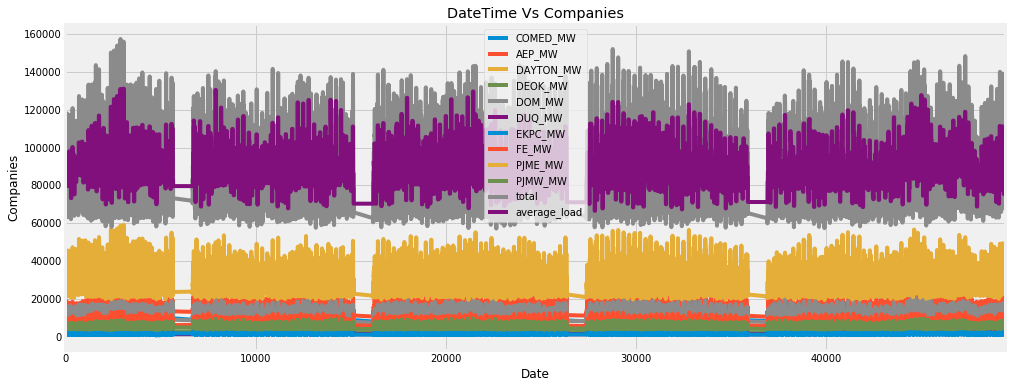

In [230]:
data.plot(figsize=(15, 6))
plt.title("DateTime Vs Companies")
#plt.xticks(data["date"].values)
plt.xlabel('Date')
plt.ylabel('Companies')
plt.show()

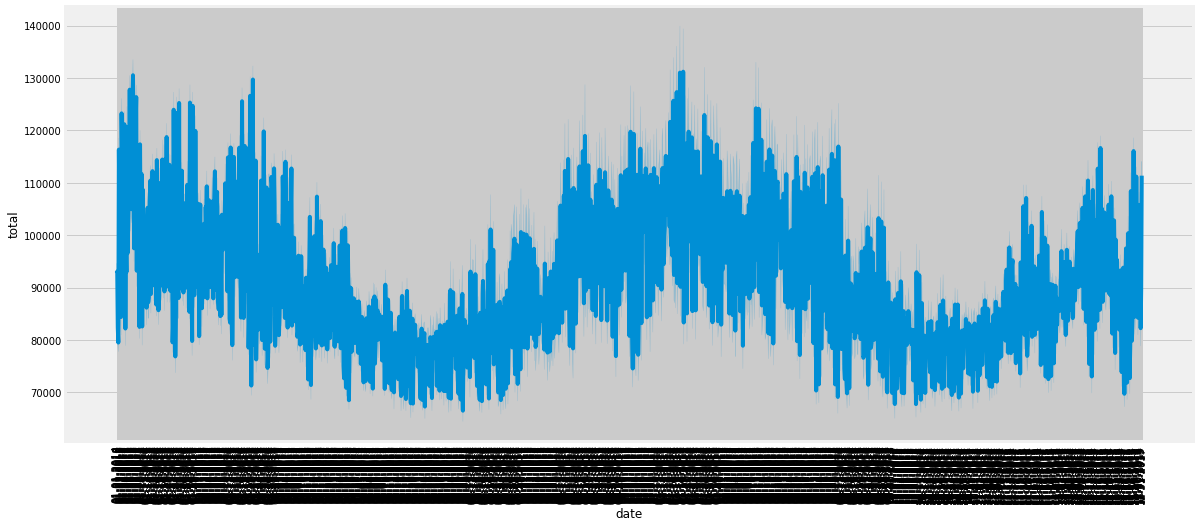

In [229]:
sns.lineplot(x = data['date'],y = data['total'])
plt.xticks(rotation = 90)
plt.show()

## Week-wise analysis

In [47]:
data1=data.copy()

In [48]:
data1['Datetime'] = pd.to_datetime(data1['Datetime'],format='%m-%d-%Y %H:%M').dt.strftime('%m-%d-%Y ')

In [49]:
data1['Datetime'] = pd.to_datetime(data1['Datetime'])

In [50]:
data1.dtypes

Datetime     datetime64[ns]
COMED_MW              int64
AEP_MW                int64
DAYTON_MW           float64
DEOK_MW               int64
DOM_MW                int64
DUQ_MW                int64
EKPC_MW               int64
FE_MW                 int64
PJME_MW               int64
PJMW_MW               int64
dtype: object

In [51]:
data1.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW
0,2013-06-01,11378,13477,1682.0,2773,10150,1739,1166,7099,32085,4808
1,2013-06-01,10584,12699,1568.0,2613,9406,1641,1098,6617,29778,4252
2,2013-06-01,9973,12274,1514.0,2499,8910,1569,1036,6351,28145,4179
3,2013-06-01,9451,11904,1467.0,2409,8551,1518,1023,6201,27031,4097
4,2013-06-01,9184,11862,1456.0,2392,8413,1503,949,6157,26404,3861


In [52]:
data1['Datetime'] = pd.to_datetime(data1['Datetime'])
#converting object type to datetime type
#creating month,date,year,hour columns
data1['Month']= data1['Datetime'].dt.month
data1['date'] = data1['Datetime'].dt.date
data1['year'] =data1['Datetime'].dt.year
data1['week'] = data1['Datetime'].dt.week
data1['weekday'] = data1['Datetime'].dt.weekday_name 

## Day on which the energy load consumption is the highest 

In [53]:
mask = (data1['Datetime'] > '2013-06-01') & (data1['Datetime'] <= '2013-06-08')

In [54]:
weekly = data1.loc[mask]

In [55]:
weekly['total']=weekly['COMED_MW']+weekly['AEP_MW']+weekly['DAYTON_MW']+weekly['DEOK_MW']+weekly['DOM_MW']+weekly['DUQ_MW']+weekly['EKPC_MW']+weekly['FE_MW']+weekly['PJME_MW']+weekly['PJMW_MW']
weekly.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,Month,date,year,week,weekday,total
167,2013-06-02,10395,14296,1751.0,3062,11487,1869,1276,7492,35637,4897,6,2013-06-02,2013,22,Sunday,92162.0
168,2013-06-02,9731,13154,1618.0,2812,10478,1757,1120,6847,32721,4964,6,2013-06-02,2013,22,Sunday,85202.0
169,2013-06-02,9078,12421,1507.0,2618,9690,1669,1069,6385,30531,4670,6,2013-06-02,2013,22,Sunday,79638.0
170,2013-06-02,8639,11964,1436.0,2476,9139,1609,1010,6080,28923,4506,6,2013-06-02,2013,22,Sunday,75782.0
171,2013-06-02,8329,11653,1383.0,2412,8780,1555,976,5965,27770,4376,6,2013-06-02,2013,22,Sunday,73199.0


In [56]:
weekly['weekly_total'] = weekly.weekday.map(weekly.groupby(['weekday']).total.mean())

#new_data['average_load_monthly'] = new_data.date1.map(new_data.groupby(['date1']).average_load.mean())

In [57]:
weekly=weekly.drop_duplicates(subset='weekday',keep='last')

In [58]:
week=pd.DataFrame()
week['weekday']=weekly['weekday']
week['weekly_total']=weekly['weekly_total']
week = week.set_index('weekday')
week.head()

,weekly_total
weekday,
Sunday,89456.625000
Monday,90663.333333
Tuesday,85008.750000
Wednesday,85768.625000
Thursday,85048.250000


Text(0, 0.5, 'Load')

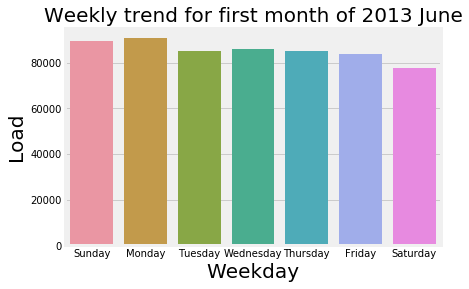

In [59]:
sns.barplot(x=week.index,y=week['weekly_total'],data=week)
plt.title('Weekly trend for first month of 2013 June',fontsize=20)
plt.xlabel('Weekday',fontsize=20)
plt.ylabel('Load',fontsize=20)


In [60]:
data1['total']=data1['COMED_MW']+data1['AEP_MW']+data1['DAYTON_MW']+data1['DEOK_MW']+data1['DOM_MW']+data1['DUQ_MW']+data1['EKPC_MW']+data1['FE_MW']+data1['PJME_MW']+data1['PJMW_MW']
data1.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,Month,date,year,week,weekday,total
0,2013-06-01,11378,13477,1682.0,2773,10150,1739,1166,7099,32085,4808,6,2013-06-01,2013,22,Saturday,86357.0
1,2013-06-01,10584,12699,1568.0,2613,9406,1641,1098,6617,29778,4252,6,2013-06-01,2013,22,Saturday,80256.0
2,2013-06-01,9973,12274,1514.0,2499,8910,1569,1036,6351,28145,4179,6,2013-06-01,2013,22,Saturday,76450.0
3,2013-06-01,9451,11904,1467.0,2409,8551,1518,1023,6201,27031,4097,6,2013-06-01,2013,22,Saturday,73652.0
4,2013-06-01,9184,11862,1456.0,2392,8413,1503,949,6157,26404,3861,6,2013-06-01,2013,22,Saturday,72181.0


## Week trend for every month in the year 2014

In [61]:
jan2014 = data1[(data1.Month==(2))& (data1.year==(2014))][(data1.weekday!="Saturday") & (data1.weekday!='Sunday')]
jan2014['total'] = jan2014.week.map(jan2014.groupby(['week']).total.mean())
jan2014 = jan2014[['Datetime','total']].reset_index().drop('index',axis=1).drop_duplicates()

In [62]:
feb2014 = data1[(data1.Month==(2))& (data1.year==(2014))][(data1.weekday!="Saturday") & (data1.weekday!='Sunday')]
feb2014['total'] = feb2014.week.map(feb2014.groupby(['week']).total.mean())
feb2014 = feb2014[['Datetime','total']].reset_index().drop('index',axis=1).drop_duplicates()

In [63]:
mar2014 = data1[(data1.Month==(3))& (data1.year==(2014))][(data1.weekday!="Saturday") & (data1.weekday!='Sunday')]
mar2014['total'] = mar2014.week.map(mar2014.groupby(['week']).total.mean())
mar2014 = mar2014[['Datetime','total']].reset_index().drop('index',axis=1).drop_duplicates()

In [64]:
apr2014 = data1[(data1.Month==(3))& (data1.year==(2014))][(data1.weekday!="Saturday") & (data1.weekday!='Sunday')]
apr2014['total'] = apr2014.week.map(apr2014.groupby(['week']).total.mean())
apr2014 = apr2014[['Datetime','total']].reset_index().drop('index',axis=1).drop_duplicates()

In [65]:
may2014 = data1[(data1.Month==(4))& (data1.year==(2014))][(data1.weekday!="Saturday") & (data1.weekday!='Sunday')]
may2014['total'] = may2014.week.map(may2014.groupby(['week']).total.mean())
may2014 = may2014[['Datetime','total']].reset_index().drop('index',axis=1).drop_duplicates()

In [66]:
jun2014 = data1[(data1.Month==(4))& (data1.year==(2014))][(data1.weekday!="Saturday") & (data1.weekday!='Sunday')]
jun2014['total'] = jun2014.week.map(jun2014.groupby(['week']).total.mean())
jun2014 = jun2014[['Datetime','total']].reset_index().drop('index',axis=1).drop_duplicates()

In [67]:
jul2014 = data1[(data1.Month==(4))& (data1.year==(2014))][(data1.weekday!="Saturday") & (data1.weekday!='Sunday')]
jul2014['total'] = jul2014.week.map(jul2014.groupby(['week']).total.mean())
jul2014 = jul2014[['Datetime','total']].reset_index().drop('index',axis=1).drop_duplicates()

In [68]:
aug2014 = data1[(data1.Month==(4))& (data1.year==(2014))][(data1.weekday!="Saturday") & (data1.weekday!='Sunday')]
aug2014['total'] = aug2014.week.map(aug2014.groupby(['week']).total.mean())
aug2014 = aug2014[['Datetime','total']].reset_index().drop('index',axis=1).drop_duplicates()

In [69]:
sep2014 = data1[(data1.Month==(4))& (data1.year==(2014))][(data1.weekday!="Saturday") & (data1.weekday!='Sunday')]
sep2014['total'] = sep2014.week.map(sep2014.groupby(['week']).total.mean())
sep2014 = sep2014[['Datetime','total']].reset_index().drop('index',axis=1).drop_duplicates()

In [70]:
oct2014 = data1[(data1.Month==(4))& (data1.year==(2014))][(data1.weekday!="Saturday") & (data1.weekday!='Sunday')]
oct2014['total'] = oct2014.week.map(oct2014.groupby(['week']).total.mean())
oct2014 = oct2014[['Datetime','total']].reset_index().drop('index',axis=1).drop_duplicates()

In [71]:
nov2014 = data1[(data1.Month==(4))& (data1.year==(2014))][(data1.weekday!="Saturday") & (data1.weekday!='Sunday')]
nov2014['total'] = nov2014.week.map(nov2014.groupby(['week']).total.mean())
nov2014 = nov2014[['Datetime','total']].reset_index().drop('index',axis=1).drop_duplicates()

In [72]:
dec2014 = data1[(data1.Month==(4))& (data1.year==(2014))][(data1.weekday!="Saturday") & (data1.weekday!='Sunday')]
dec2014['total'] = dec2014.week.map(dec2014.groupby(['week']).total.mean())
dec2014 = dec2014[['Datetime','total']].reset_index().drop('index',axis=1).drop_duplicates()

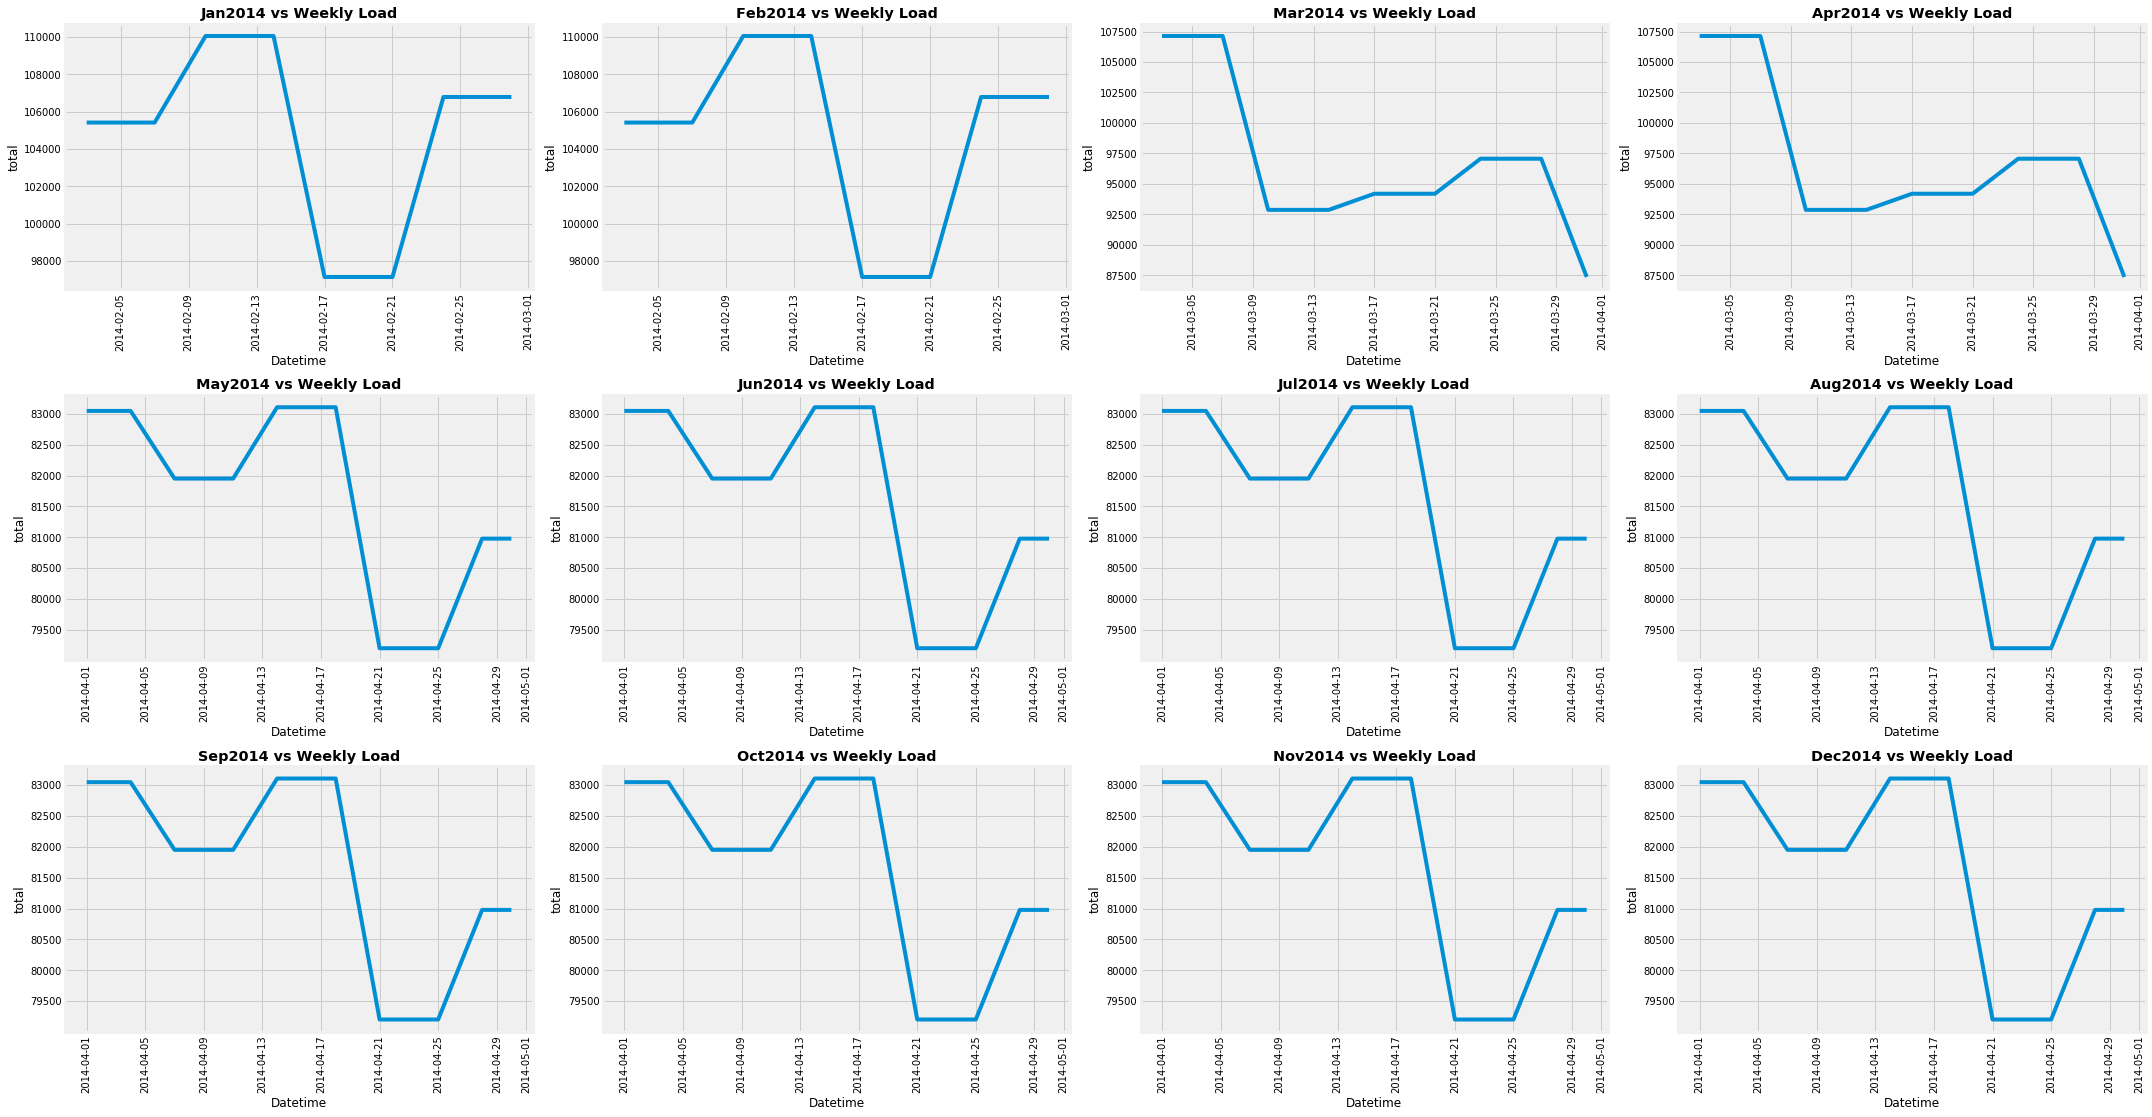

In [73]:
fig = plt.figure(figsize=(30,30))


ax = fig.add_subplot(6,4,1)
sns.lineplot(x='Datetime',y='total',data=jan2014)
plt.xticks(rotation=90)
plt.title("Jan2014 vs Weekly Load",weight  = 'bold')

ax = fig.add_subplot(6,4,2)
sns.lineplot(x='Datetime',y='total',data=feb2014)
plt.xticks(rotation=90)
plt.title("Feb2014 vs Weekly Load",weight  = 'bold')

ax = fig.add_subplot(6,4,3)
sns.lineplot(x='Datetime',y='total',data=mar2014)
plt.xticks(rotation=90)
plt.title("Mar2014 vs Weekly Load",weight  = 'bold')

ax = fig.add_subplot(6,4,4)
sns.lineplot(x='Datetime',y='total',data=apr2014)
plt.xticks(rotation=90)
plt.title("Apr2014 vs Weekly Load",weight  = 'bold')

ax = fig.add_subplot(6,4,5)
sns.lineplot(x='Datetime',y='total',data=may2014)
plt.xticks(rotation=90)
plt.title("May2014 vs Weekly Load",weight  = 'bold')

ax = fig.add_subplot(6,4,6)
sns.lineplot(x='Datetime',y='total',data=jun2014)
plt.xticks(rotation=90)
plt.title("Jun2014 vs Weekly Load",weight  = 'bold')

ax = fig.add_subplot(6,4,7)
sns.lineplot(x='Datetime',y='total',data=jul2014)
plt.xticks(rotation=90)
plt.title("Jul2014 vs Weekly Load",weight  = 'bold')

ax = fig.add_subplot(6,4,8)
sns.lineplot(x='Datetime',y='total',data=aug2014)
plt.xticks(rotation=90)
plt.title("Aug2014 vs Weekly Load",weight  = 'bold')

ax = fig.add_subplot(6,4,9)
sns.lineplot(x='Datetime',y='total',data=sep2014)
plt.xticks(rotation=90)
plt.title("Sep2014 vs Weekly Load",weight  = 'bold')

ax = fig.add_subplot(6,4,10)
sns.lineplot(x='Datetime',y='total',data=oct2014)
plt.xticks(rotation=90)
plt.title("Oct2014 vs Weekly Load",weight  = 'bold')

ax = fig.add_subplot(6,4,11)
sns.lineplot(x='Datetime',y='total',data=nov2014)
plt.xticks(rotation=90)
plt.title("Nov2014 vs Weekly Load",weight  = 'bold')


ax = fig.add_subplot(6,4,12)
sns.lineplot(x='Datetime',y='total',data=dec2014)
plt.xticks(rotation=90)
plt.title("Dec2014 vs Weekly Load",weight  = 'bold')

plt.tight_layout()
plt.show()

## **Calculating the total load consumed on each day**

In [74]:
data1['total']=data1['COMED_MW']+data1['AEP_MW']+data1['DAYTON_MW']+data1['DEOK_MW']+data1['DOM_MW']+data1['DUQ_MW']+data1['EKPC_MW']+data1['FE_MW']+data1['PJME_MW']+data1['PJMW_MW']

In [75]:
data1.tail()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,Month,date,year,week,weekday,total
49416,2018-07-31,13921,16727,2365.0,4061,15128,1898,1951,8997,41299,6426,7,2018-07-31,2018,31,Tuesday,112773.0
49417,2018-07-31,13532,16674,2316.0,3918,14647,1876,1884,8871,40289,6276,7,2018-07-31,2018,31,Tuesday,110283.0
49418,2018-07-31,13300,16556,2265.0,3781,14340,1855,1792,8900,39938,6250,7,2018-07-31,2018,31,Tuesday,108977.0
49419,2018-07-31,13346,16252,2219.0,3714,13766,1830,1765,8785,38610,6123,7,2018-07-31,2018,31,Tuesday,106410.0
49420,2018-07-31,12898,15504,2096.0,3503,12787,1740,1614,8318,35950,5771,7,2018-07-31,2018,31,Tuesday,100181.0


In [76]:
weekmonthtrend = data1[data1['year']==2013]

In [77]:
weekmonthtrend = weekmonthtrend.groupby(['year','Month','week'])['total'].mean()

In [78]:
mw13=pd.DataFrame(weekmonthtrend)

In [79]:
mw13 = mw13.reset_index()

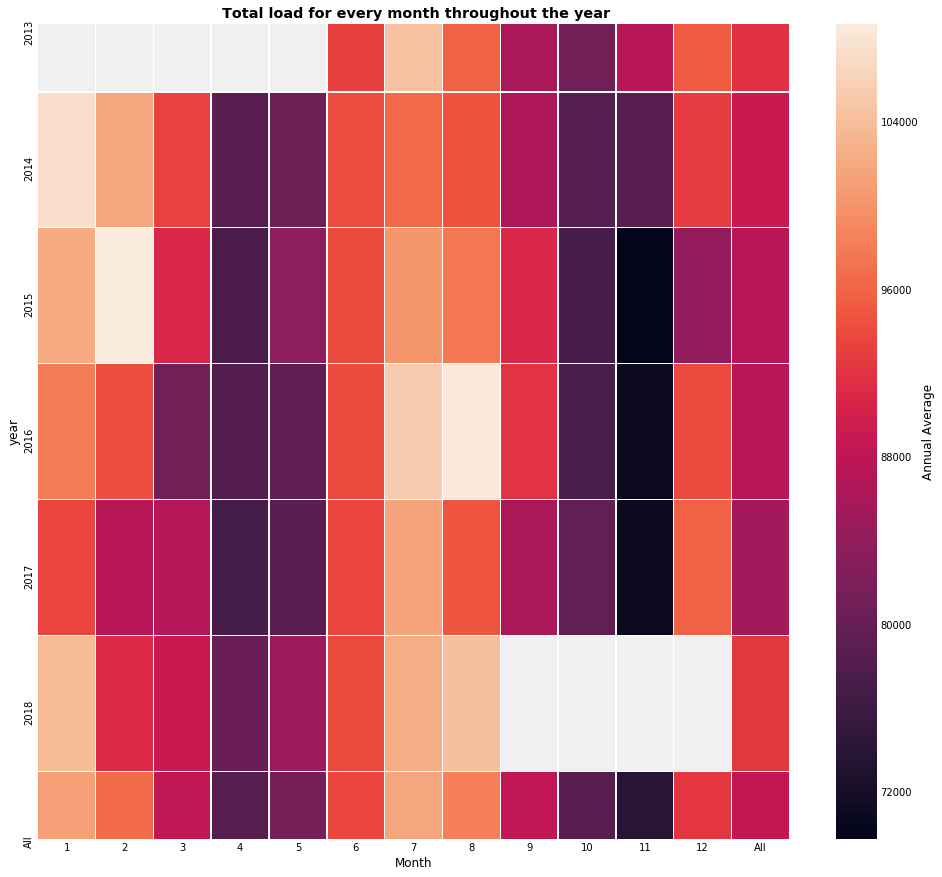

In [80]:
#Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} Total load for every month throughout the year'.format(''),weight = 'bold')
sns.heatmap(data1.pivot_table('total', index='year',
               columns=['Month'],aggfunc='mean',margins=True),
               linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})

## Heatmap for Load consumed - every week in every year 

In [81]:
total = data1[['year','Month','week','total']]

In [82]:
total = total.groupby(['year','week'])['total'].mean()

In [83]:
total = total.reset_index()

In [84]:
total = pd.DataFrame(total)

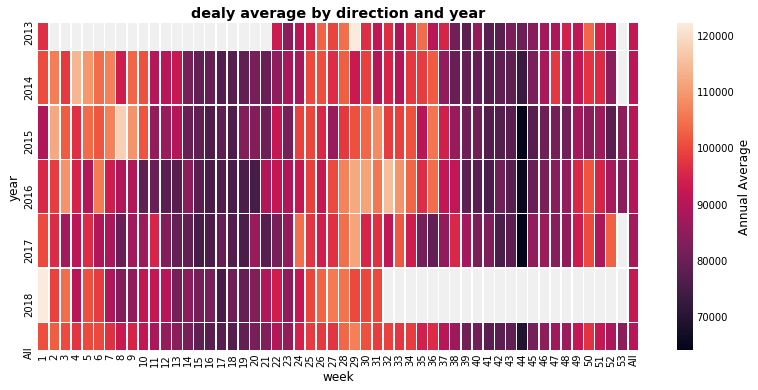

In [85]:
#Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(12,6))
ax.set_title('{} average by direction and year'.format('dealy'),weight = 'bold')
sns.heatmap(total.pivot_table('total', index='year',
               columns=['week'],aggfunc='mean',margins=True),
               linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})

## Month-wise Cummulative Load for all companies

In [237]:
monthly = data1.groupby('Month')['AEP_MW','DAYTON_MW','COMED_MW','DEOK_MW','DOM_MW','DUQ_MW','EKPC_MW','FE_MW','PJME_MW','PJMW_MW'].sum()

In [238]:
monthly= monthly.reset_index()

In [239]:
monthly["Month"] = monthly["Month"].replace(1, "Jan")
monthly["Month"] = monthly['Month'].replace(2,'Feb')
monthly["Month"] = monthly['Month'].replace(3,'Mar')
monthly["Month"] = monthly['Month'].replace(4,'Apr')
monthly["Month"] = monthly['Month'].replace(5,'May')
monthly["Month"] = monthly['Month'].replace(6,'June')
monthly["Month"] = monthly['Month'].replace(7,'July')
monthly["Month"] = monthly['Month'].replace(8,'Aug')
monthly["Month"] = monthly['Month'].replace(9,'Sept')
monthly["Month"] = monthly['Month'].replace(10,'Oct')
monthly["Month"] = monthly['Month'].replace(11,'Nov')
monthly["Month"] = monthly['Month'].replace(12,'Dec')

In [240]:
monthly= monthly.set_index("Month")

In [241]:
monthly

,AEP_MW,DAYTON_MW,COMED_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW
Month,,,,,,,,,,
Jan,63763198,8326158.0,44586620,12637212,48038875,6344550,7117646,31458955,128745115,24746708
Feb,55245769,7276811.0,39267320,10935012,40762886,5578842,5865438,27980481,112577436,21508483
Mar,55192085,7271525.0,39552530,10903372,40044219,5695871,5432324,28727085,113470456,21495400
Apr,47666890,6368939.0,35715076,9626605,33434589,5050825,4412068,25325062,96714715,17969435
May,50252988,6864124.0,38372894,10882920,37528013,5617277,4718205,26526076,103842569,18665741
June,65101630,8992412.0,51811518,14536836,51094599,7475898,6233396,34363826,141550483,23660011
July,69883886,9575056.0,57896618,15571301,57343854,8329588,6742150,37684764,165369939,26016853
Aug,58567881,8181416.0,48386331,13114749,45664861,6821581,5539940,31523992,131434436,21399998
Sept,51233963,7037925.0,41484883,11196977,38823934,5871072,4649169,27455893,111310396,18725327


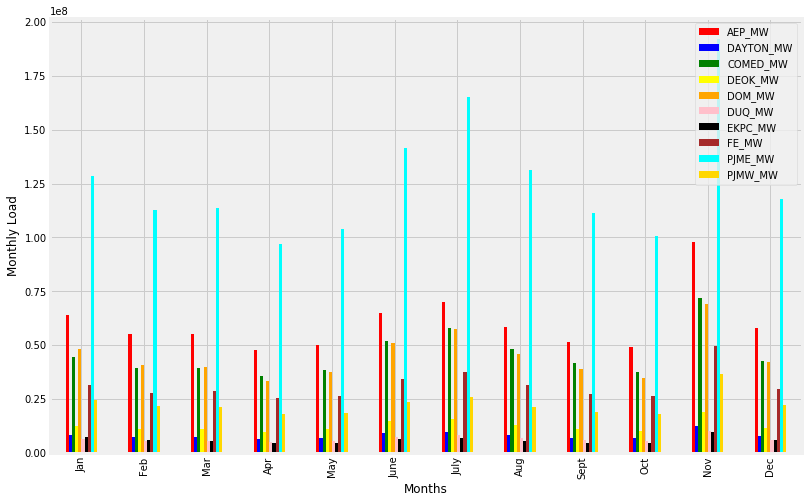

In [242]:
monthly.plot(figsize=(12,8),kind='bar',colors=['red','blue','green','yellow','orange','pink','black','brown','cyan','gold'])
plt.ylabel('Monthly Load')
plt.xlabel("Months")
plt.xticks(rotation=90)
plt.show()

## Month in which the load is the highest

In [92]:
monthly['total']=monthly['COMED_MW']+monthly['AEP_MW']+monthly['DAYTON_MW']+monthly['DEOK_MW']+monthly['DOM_MW']+monthly['DUQ_MW']+monthly['EKPC_MW']+monthly['FE_MW']+monthly['PJME_MW']+monthly['PJMW_MW']

In [93]:
monthly = monthly.reset_index()

In [94]:
monthly

,Month,AEP_MW,DAYTON_MW,COMED_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,total
0,Jan,63763198,8326158.0,44586620,12637212,48038875,6344550,7117646,31458955,128745115,24746708,375765037.0
1,Feb,55245769,7276811.0,39267320,10935012,40762886,5578842,5865438,27980481,112577436,21508483,326998478.0
2,Mar,55192085,7271525.0,39552530,10903372,40044219,5695871,5432324,28727085,113470456,21495400,327784867.0
3,Apr,47666890,6368939.0,35715076,9626605,33434589,5050825,4412068,25325062,96714715,17969435,282284204.0
4,May,50252988,6864124.0,38372894,10882920,37528013,5617277,4718205,26526076,103842569,18665741,303270807.0
5,June,65101630,8992412.0,51811518,14536836,51094599,7475898,6233396,34363826,141550483,23660011,404820609.0
6,July,69883886,9575056.0,57896618,15571301,57343854,8329588,6742150,37684764,165369939,26016853,454414009.0
7,Aug,58567881,8181416.0,48386331,13114749,45664861,6821581,5539940,31523992,131434436,21399998,370635185.0
8,Sept,51233963,7037925.0,41484883,11196977,38823934,5871072,4649169,27455893,111310396,18725327,317789539.0
9,Oct,49172241,6668300.0,37439534,10116666,34815398,5368935,4407514,26157796,100612537,18152016,292910937.0


In [95]:
monthly.total.max()

568478928.0

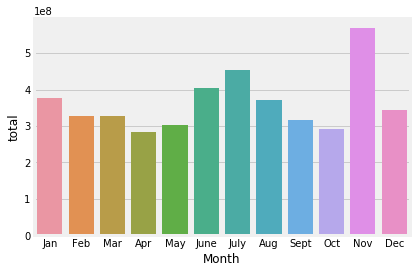

In [96]:
sns.barplot(x='Month',y= 'total', data = monthly)

**The month in which there is the highest load observed is November**

### REMOVE DUPLICATES

In [97]:
data=data.drop_duplicates(subset='Datetime',keep='last') 

In [98]:
x = data["Datetime"].str.split(" ", n = 1, expand = True) 

In [99]:
data['date']=x[0]

In [100]:
data.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,date
0,06-01-2013 01:00,11378,13477,1682.0,2773,10150,1739,1166,7099,32085,4808,06-01-2013
1,06-01-2013 02:00,10584,12699,1568.0,2613,9406,1641,1098,6617,29778,4252,06-01-2013
2,06-01-2013 03:00,9973,12274,1514.0,2499,8910,1569,1036,6351,28145,4179,06-01-2013
3,06-01-2013 04:00,9451,11904,1467.0,2409,8551,1518,1023,6201,27031,4097,06-01-2013
4,06-01-2013 05:00,9184,11862,1456.0,2392,8413,1503,949,6157,26404,3861,06-01-2013


### Creating a new column Total for the sum of all the individual loads 

In [101]:
data['total']=data['COMED_MW']+data['AEP_MW']+data['DAYTON_MW']+data['DEOK_MW']+data['DOM_MW']+data['DUQ_MW']+data['EKPC_MW']+data['FE_MW']+data['PJME_MW']+data['PJMW_MW']


In [102]:
data.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,date,total
0,06-01-2013 01:00,11378,13477,1682.0,2773,10150,1739,1166,7099,32085,4808,06-01-2013,86357.0
1,06-01-2013 02:00,10584,12699,1568.0,2613,9406,1641,1098,6617,29778,4252,06-01-2013,80256.0
2,06-01-2013 03:00,9973,12274,1514.0,2499,8910,1569,1036,6351,28145,4179,06-01-2013,76450.0
3,06-01-2013 04:00,9451,11904,1467.0,2409,8551,1518,1023,6201,27031,4097,06-01-2013,73652.0
4,06-01-2013 05:00,9184,11862,1456.0,2392,8413,1503,949,6157,26404,3861,06-01-2013,72181.0


### Grouping the date - Day Wise and Calculating the average load 

In [103]:
data['average_load'] = data.date.map(data.groupby(['date']).total.mean())

In [104]:
new_data=data.drop_duplicates(subset='date',keep='last')

In [105]:
new_data.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,date,total,average_load
22,06-01-2013 23:00,11044,15367,1913.0,3285,12648,2024,1398,8006,38823,5847,06-01-2013,100355.0,96866.217391
46,07-01-2013 23:00,11833,15201,1865.0,3085,12309,1921,1366,7734,37040,5882,07-01-2013,98236.0,96241.916667
70,08-01-2013 23:00,12821,15865,2117.0,3323,11374,1890,1490,8112,33558,5706,08-01-2013,96256.0,95712.541667
94,09-01-2013 23:00,13687,14874,2049.0,3451,12266,1843,1489,8009,37126,5379,09-01-2013,100173.0,96057.125000
118,10-01-2013 23:00,12290,13577,1910.0,3004,9595,1612,1291,7368,28415,4952,10-01-2013,84014.0,84013.083333


In [106]:
new_data['date']=pd.to_datetime(new_data['date'])
new_data.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,date,total,average_load
22,06-01-2013 23:00,11044,15367,1913.0,3285,12648,2024,1398,8006,38823,5847,2013-06-01,100355.0,96866.217391
46,07-01-2013 23:00,11833,15201,1865.0,3085,12309,1921,1366,7734,37040,5882,2013-07-01,98236.0,96241.916667
70,08-01-2013 23:00,12821,15865,2117.0,3323,11374,1890,1490,8112,33558,5706,2013-08-01,96256.0,95712.541667
94,09-01-2013 23:00,13687,14874,2049.0,3451,12266,1843,1489,8009,37126,5379,2013-09-01,100173.0,96057.125000
118,10-01-2013 23:00,12290,13577,1910.0,3004,9595,1612,1291,7368,28415,4952,2013-10-01,84014.0,84013.083333


In [107]:
new_data['date1']=pd.to_datetime(new_data['date'],format='%m-%Y').dt.strftime('%m-%Y')
new_data.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,date,total,average_load,date1
22,06-01-2013 23:00,11044,15367,1913.0,3285,12648,2024,1398,8006,38823,5847,2013-06-01,100355.0,96866.217391,06-2013
46,07-01-2013 23:00,11833,15201,1865.0,3085,12309,1921,1366,7734,37040,5882,2013-07-01,98236.0,96241.916667,07-2013
70,08-01-2013 23:00,12821,15865,2117.0,3323,11374,1890,1490,8112,33558,5706,2013-08-01,96256.0,95712.541667,08-2013
94,09-01-2013 23:00,13687,14874,2049.0,3451,12266,1843,1489,8009,37126,5379,2013-09-01,100173.0,96057.125000,09-2013
118,10-01-2013 23:00,12290,13577,1910.0,3004,9595,1612,1291,7368,28415,4952,2013-10-01,84014.0,84013.083333,10-2013


### Grouping the date - Month Wise and Calculating the average load 

In [108]:
new_data['average_load_monthly'] = new_data.date1.map(new_data.groupby(['date1']).average_load.mean())

In [109]:
final_data=new_data.drop_duplicates(subset='date1',keep='last')

In [110]:
final = final_data.reset_index()

In [111]:
del final['index']

In [112]:
final=final.reset_index()

### Dropping the unwanted columns 


In [113]:
drop_ls=['average_load','total','Datetime']

In [114]:
final_data=final_data.drop(drop_ls,axis=1)

In [115]:
final_data

,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,date,date1,average_load_monthly
4893,10668,14774,1849.0,3060,12207,1849,1457,7613,36352,5639,2013-06-30,06-2013,93083.893357
4965,11368,13618,1824.0,2915,9023,1574,1243,7142,27008,4845,2013-09-30,09-2013,86189.201389
5013,10774,15231,1794.0,2849,11862,1636,1617,7374,31574,5979,2013-11-30,11-2013,87380.081884
5061,12537,15290,2068.0,3326,11263,1779,1426,8288,35137,5463,2013-07-31,07-2013,104481.587366
5085,12565,15091,1964.0,3237,12247,2067,1455,8381,37668,5725,2013-08-31,08-2013,95767.965054
5109,10822,13300,1840.0,2772,8911,1562,1136,7075,27000,4858,2013-10-31,10-2013,81089.736559
5133,12503,16335,1942.0,3132,11934,1792,1892,7898,33766,6302,2013-12-31,12-2013,95175.806452
13978,12884,17632,2209.0,3351,14135,1820,1833,8898,38652,7156,2014-02-28,02-2014,101719.750000
14554,10844,13585,1757.0,2633,9166,1476,1185,7297,28544,5010,2014-04-30,04-2014,79001.398611
14602,14189,17448,2496.0,4206,13011,2205,1833,10165,38917,6428,2014-06-30,06-2014,94123.608333


In [116]:
latest_data=final_data.copy()

In [117]:
latest_data

,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,date,date1,average_load_monthly
4893,10668,14774,1849.0,3060,12207,1849,1457,7613,36352,5639,2013-06-30,06-2013,93083.893357
4965,11368,13618,1824.0,2915,9023,1574,1243,7142,27008,4845,2013-09-30,09-2013,86189.201389
5013,10774,15231,1794.0,2849,11862,1636,1617,7374,31574,5979,2013-11-30,11-2013,87380.081884
5061,12537,15290,2068.0,3326,11263,1779,1426,8288,35137,5463,2013-07-31,07-2013,104481.587366
5085,12565,15091,1964.0,3237,12247,2067,1455,8381,37668,5725,2013-08-31,08-2013,95767.965054
5109,10822,13300,1840.0,2772,8911,1562,1136,7075,27000,4858,2013-10-31,10-2013,81089.736559
5133,12503,16335,1942.0,3132,11934,1792,1892,7898,33766,6302,2013-12-31,12-2013,95175.806452
13978,12884,17632,2209.0,3351,14135,1820,1833,8898,38652,7156,2014-02-28,02-2014,101719.750000
14554,10844,13585,1757.0,2633,9166,1476,1185,7297,28544,5010,2014-04-30,04-2014,79001.398611
14602,14189,17448,2496.0,4206,13011,2205,1833,10165,38917,6428,2014-06-30,06-2014,94123.608333


In [118]:
latest_data['date2']=pd.to_datetime(latest_data['date1'])

latest_data['date3']=pd.to_datetime(latest_data['date2'],format='%Y%m').dt.strftime('%Y%m')


In [119]:
latest_data.head()

,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,date,date1,average_load_monthly,date2,date3
4893,10668,14774,1849.0,3060,12207,1849,1457,7613,36352,5639,2013-06-30,06-2013,93083.893357,2013-06-01,201306
4965,11368,13618,1824.0,2915,9023,1574,1243,7142,27008,4845,2013-09-30,09-2013,86189.201389,2013-09-01,201309
5013,10774,15231,1794.0,2849,11862,1636,1617,7374,31574,5979,2013-11-30,11-2013,87380.081884,2013-11-01,201311
5061,12537,15290,2068.0,3326,11263,1779,1426,8288,35137,5463,2013-07-31,07-2013,104481.587366,2013-07-01,201307
5085,12565,15091,1964.0,3237,12247,2067,1455,8381,37668,5725,2013-08-31,08-2013,95767.965054,2013-08-01,201308


In [120]:
last_data=latest_data.sort_values(by=['date3'])

In [121]:
last_data.head()

,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,date,date1,average_load_monthly,date2,date3
4893,10668,14774,1849.0,3060,12207,1849,1457,7613,36352,5639,2013-06-30,06-2013,93083.893357,2013-06-01,201306
5061,12537,15290,2068.0,3326,11263,1779,1426,8288,35137,5463,2013-07-31,07-2013,104481.587366,2013-07-01,201307
5085,12565,15091,1964.0,3237,12247,2067,1455,8381,37668,5725,2013-08-31,08-2013,95767.965054,2013-08-01,201308
4965,11368,13618,1824.0,2915,9023,1574,1243,7142,27008,4845,2013-09-30,09-2013,86189.201389,2013-09-01,201309
5109,10822,13300,1840.0,2772,8911,1562,1136,7075,27000,4858,2013-10-31,10-2013,81089.736559,2013-10-01,201310


In [122]:
drop_item=['date3','date','date1']

In [123]:
last_data=last_data.drop(drop_item,axis=1)

In [124]:
last_data.head()

,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,average_load_monthly,date2
4893,10668,14774,1849.0,3060,12207,1849,1457,7613,36352,5639,93083.893357,2013-06-01
5061,12537,15290,2068.0,3326,11263,1779,1426,8288,35137,5463,104481.587366,2013-07-01
5085,12565,15091,1964.0,3237,12247,2067,1455,8381,37668,5725,95767.965054,2013-08-01
4965,11368,13618,1824.0,2915,9023,1574,1243,7142,27008,4845,86189.201389,2013-09-01
5109,10822,13300,1840.0,2772,8911,1562,1136,7075,27000,4858,81089.736559,2013-10-01


## Creating the train and test data for time series analysis 

In [125]:
mask = (last_data['date2'] > '2017-12-01') & (last_data['date2'] <= '2018-12-01')

In [126]:
test = last_data.loc[mask]

In [127]:
test.head()

,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,average_load_monthly,date2
49348,11614,16057,2083.0,3054,13095,1510,1663,7917,34651,6345,103732.873656,2018-01-01
48916,10833,13542,1840.0,2740,9808,1345,1308,7229,27326,5205,91158.473214,2018-02-01
49372,9857,12591,1633.0,2593,9357,1325,1235,6480,26400,4889,89026.167309,2018-03-01
49252,10358,12848,1747.0,2576,9001,1350,1260,6728,26211,4918,80350.234722,2018-04-01
49396,15752,16419,2310.0,3437,12289,1993,1400,9657,32297,5952,85109.315860,2018-05-01


In [128]:
mask = (last_data['date2'] <= '2017-12-01')
train = last_data.loc[mask]

In [129]:
train.head()

,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,average_load_monthly,date2
4893,10668,14774,1849.0,3060,12207,1849,1457,7613,36352,5639,93083.893357,2013-06-01
5061,12537,15290,2068.0,3326,11263,1779,1426,8288,35137,5463,104481.587366,2013-07-01
5085,12565,15091,1964.0,3237,12247,2067,1455,8381,37668,5725,95767.965054,2013-08-01
4965,11368,13618,1824.0,2915,9023,1574,1243,7142,27008,4845,86189.201389,2013-09-01
5109,10822,13300,1840.0,2772,8911,1562,1136,7075,27000,4858,81089.736559,2013-10-01


In [130]:
train=train.set_index("date2")
test=test.set_index("date2")

In [131]:
Train=pd.DataFrame()
Train['average_load_monthly']=train['average_load_monthly']
Train.head()

,average_load_monthly
date2,
2013-06-01,93083.893357
2013-07-01,104481.587366
2013-08-01,95767.965054
2013-09-01,86189.201389
2013-10-01,81089.736559


In [132]:
Test=pd.DataFrame()
Test['average_load_monthly']=test['average_load_monthly']
Test

,average_load_monthly
date2,
2018-01-01,103732.873656
2018-02-01,91158.473214
2018-03-01,89026.167309
2018-04-01,80350.234722
2018-05-01,85109.315860
2018-06-01,93894.320833
2018-07-01,102559.393817
2018-08-01,101957.513889


In [133]:
last_data.head()

,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,average_load_monthly,date2
4893,10668,14774,1849.0,3060,12207,1849,1457,7613,36352,5639,93083.893357,2013-06-01
5061,12537,15290,2068.0,3326,11263,1779,1426,8288,35137,5463,104481.587366,2013-07-01
5085,12565,15091,1964.0,3237,12247,2067,1455,8381,37668,5725,95767.965054,2013-08-01
4965,11368,13618,1824.0,2915,9023,1574,1243,7142,27008,4845,86189.201389,2013-09-01
5109,10822,13300,1840.0,2772,8911,1562,1136,7075,27000,4858,81089.736559,2013-10-01


In [134]:
first=pd.DataFrame()
first['average_load_monthly']=last_data['average_load_monthly']
first['date']=last_data['date2']

In [135]:
first = first.set_index('date')

In [136]:
first.head()

,average_load_monthly
date,
2013-06-01,93083.893357
2013-07-01,104481.587366
2013-08-01,95767.965054
2013-09-01,86189.201389
2013-10-01,81089.736559


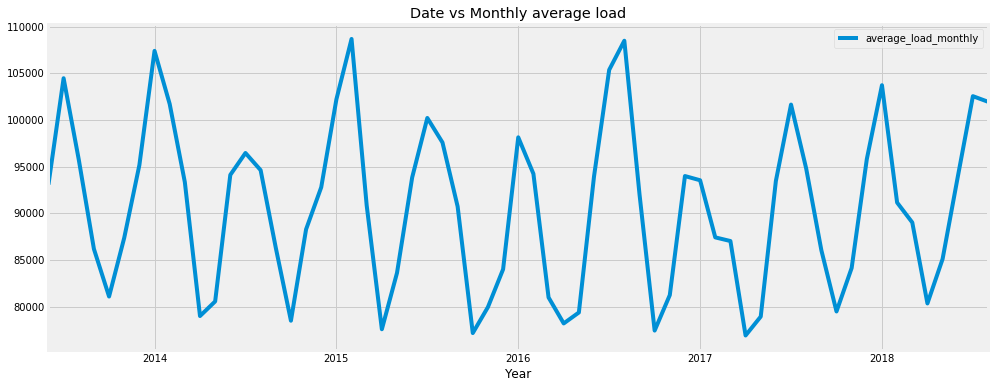

In [137]:
first.plot(figsize=(15, 6))
plt.title("Date vs Monthly average load")
plt.xlabel('Year')
plt.show()

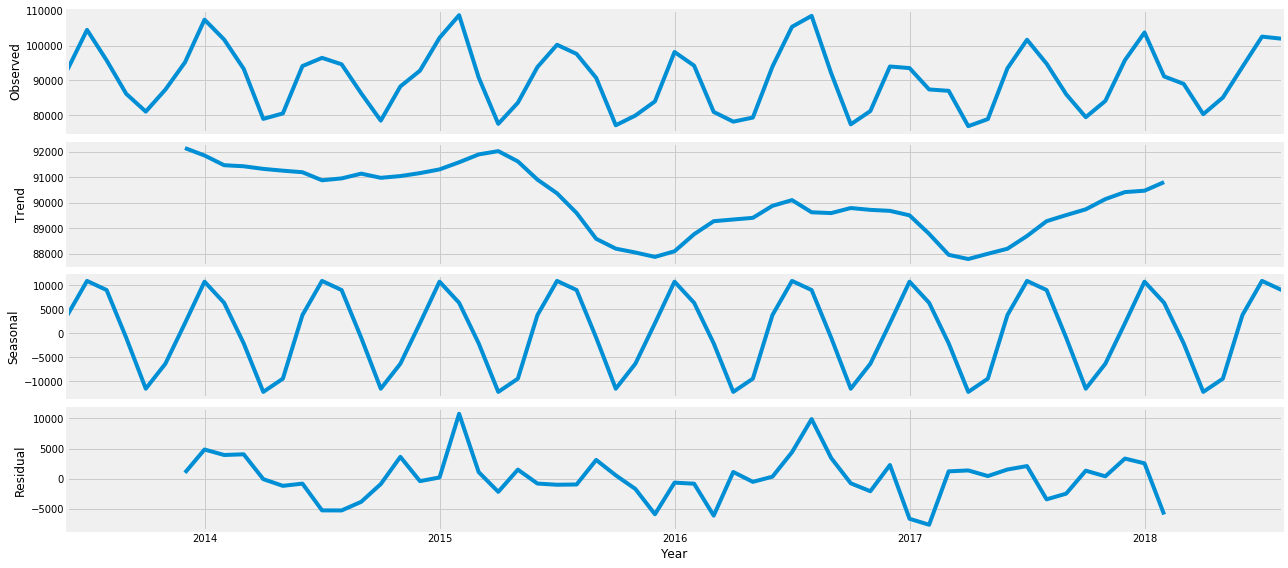

In [138]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(first,model='additive')
fig = decomposition.plot()
plt.xlabel('Year')
plt.show()

In [139]:
Train['average_load_monthly']=np.log(Train.average_load_monthly).diff()

In [140]:
Train.dropna(inplace=True)

In [141]:
Train.head()

,average_load_monthly
date2,
2013-07-01,0.115510
2013-08-01,-0.087083
2013-09-01,-0.105383
2013-10-01,-0.060988
2013-11-01,0.074711


In [142]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [143]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(first,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1593.9867312856732
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:104952.68293921831
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1005.939825177094
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:774.9013519112701
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1026.691906295648
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1010.1253335514767
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:788.46055764923
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:766.2529156781833
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1526.1974967581027
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:103795.42649126032
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:979.0988933682046
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:737.6896843526171
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1345.9135712702098
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1280.573632855284
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:782.7162286814115
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:738.089766032813
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1285.3931080930106
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1014.5733425186057
ARIMA

In [144]:
mod = sm.tsa.statespace.SARIMAX(first,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1311      0.468      0.280      0.779      -0.786       1.049
ma.L1         -0.5289      0.383     -1.381      0.167      -1.280       0.222
ma.S.L12      -0.4075      0.120     -3.407      0.001      -0.642      -0.173
sigma2      3.415e+07   3.01e-09   1.13e+16      0.000    3.42e+07    3.42e+07


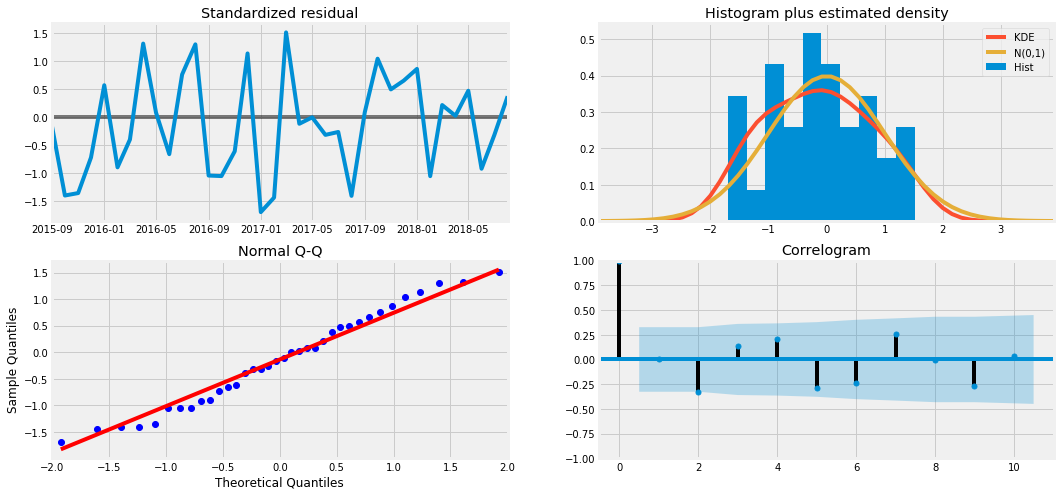

In [145]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

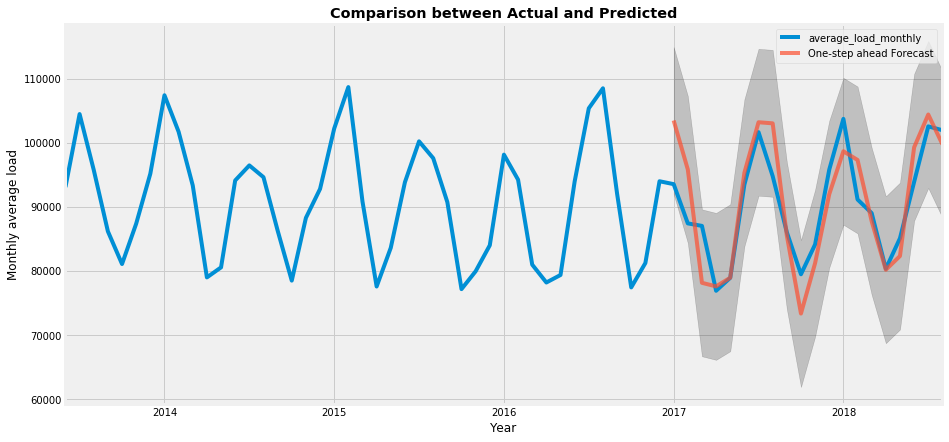

In [146]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = first['2013-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('Monthly average load')
plt.title("Comparison between Actual and Predicted",weight  = 'bold')
plt.legend()
plt.show()

In [147]:
 y_forecasted = pred.predicted_mean
y_truth = first['2017-01-01':]

In [148]:
def mean_absolute_percentage_error(y_forecasted , y_truth): 
    y_true, y_pred = np.array(y_forecasted), np.array(y_truth)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [149]:
p = mean_absolute_percentage_error(y_forecasted , y_truth)
print("The mean absolute percentage error is",p)

The mean absolute percentage error is 11.98079529334284


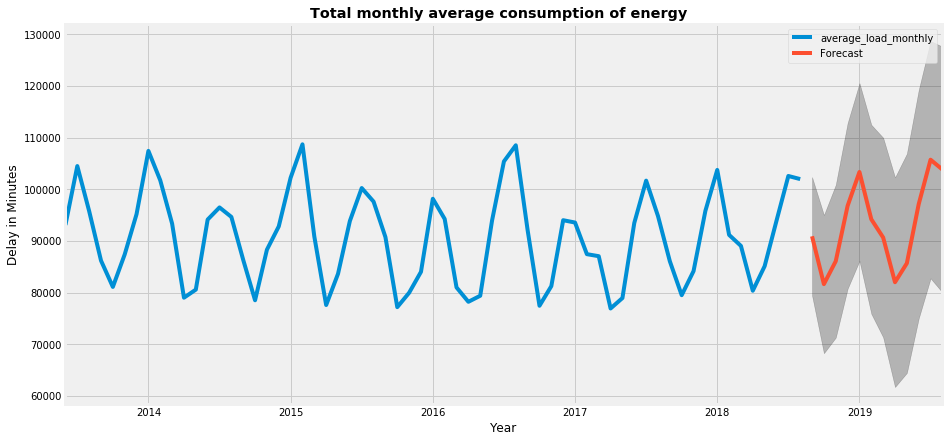

In [150]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = first.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.title("Total monthly average consumption of energy  ",weight  = 'bold')
ax.set_xlabel('Year')
ax.set_ylabel('Delay in Minutes')
plt.legend()
plt.show()

In [151]:
pred = pd.DataFrame(pred_uc.predicted_mean) 

In [152]:
pred['Datetime']= pred.index

In [153]:
pred['Total Load']= pred[0]

In [154]:
del pred[0]

In [155]:
pred = pred.reset_index()

In [156]:
del pred['index']

In [157]:
pred.to_csv('Predicted.csv')

In [158]:
data

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,date,total,average_load
0,06-01-2013 01:00,11378,13477,1682.0,2773,10150,1739,1166,7099,32085,4808,06-01-2013,86357.0,96866.217391
1,06-01-2013 02:00,10584,12699,1568.0,2613,9406,1641,1098,6617,29778,4252,06-01-2013,80256.0,96866.217391
2,06-01-2013 03:00,9973,12274,1514.0,2499,8910,1569,1036,6351,28145,4179,06-01-2013,76450.0,96866.217391
3,06-01-2013 04:00,9451,11904,1467.0,2409,8551,1518,1023,6201,27031,4097,06-01-2013,73652.0,96866.217391
4,06-01-2013 05:00,9184,11862,1456.0,2392,8413,1503,949,6157,26404,3861,06-01-2013,72181.0,96866.217391
5,06-01-2013 06:00,9043,11976,1485.0,2425,8409,1515,1017,6187,26261,4058,06-01-2013,72376.0,96866.217391
6,06-01-2013 07:00,9054,12447,1511.0,2469,8582,1531,1036,6257,27012,4166,06-01-2013,74065.0,96866.217391
7,06-01-2013 08:00,9290,12713,1596.0,2606,9600,1586,1096,6606,29631,4644,06-01-2013,79368.0,96866.217391
8,06-01-2013 09:00,9980,13730,1711.0,2823,10816,1745,1200,7182,32969,5163,06-01-2013,87319.0,96866.217391
9,06-01-2013 10:00,10590,14609,1823.0,3013,12017,1903,1285,7777,36070,5706,06-01-2013,94793.0,96866.217391


## Hourly Analysis 

### Single day

In [159]:
single = data.loc[data['Datetime'].str.contains('06-02-2015')] 

In [160]:
single=single.drop(['COMED_MW','AEP_MW','DAYTON_MW','DEOK_MW','DOM_MW','DUQ_MW','EKPC_MW','FE_MW','PJME_MW','PJMW_MW','date'],axis=1)

In [161]:
del single['average_load']

In [162]:
single.head()

,Datetime,total
16346,06-02-2015 00:00,77336.0
16347,06-02-2015 01:00,71706.0
16348,06-02-2015 02:00,68637.0
16349,06-02-2015 03:00,66710.0
16350,06-02-2015 04:00,65914.0


In [163]:
single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 16346 to 16369
Data columns (total 2 columns):
Datetime    24 non-null object
total       24 non-null float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [164]:
single['Datetime']=pd.to_datetime(single['Datetime'])

In [165]:
single = single.set_index('Datetime')

In [166]:
single

,total
Datetime,
2015-06-02 00:00:00,77336.0
2015-06-02 01:00:00,71706.0
2015-06-02 02:00:00,68637.0
2015-06-02 03:00:00,66710.0
2015-06-02 04:00:00,65914.0
2015-06-02 05:00:00,66632.0
2015-06-02 06:00:00,70306.0
2015-06-02 07:00:00,76475.0
2015-06-02 08:00:00,81765.0


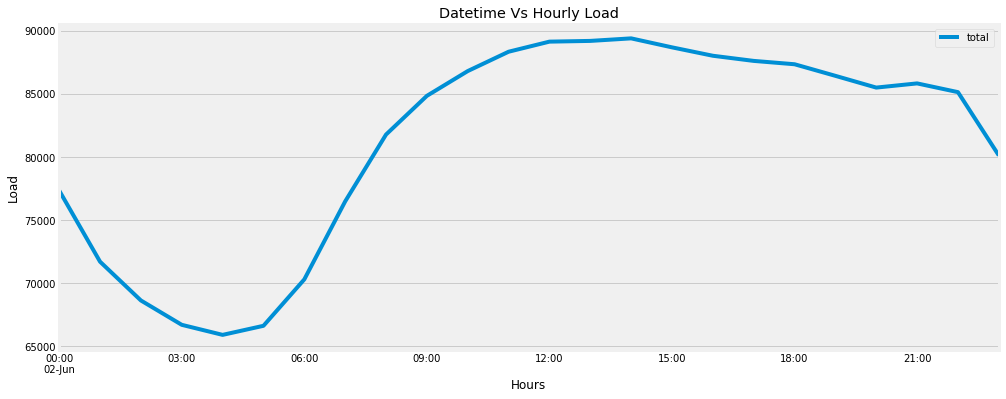

In [167]:
single.plot(figsize=(15, 6))
plt.title("Datetime Vs Hourly Load")
plt.xlabel('Hours')
plt.ylabel('Load')
plt.show()

In [168]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [169]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(single,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:587.5928988245093
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:245.5538094586269
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:261.6465705230929
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:549.0204025031187
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:217.23177645998274
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:299.82644158856294
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:408.8768260099303
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:197.17623627743768
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:196.68316415819942
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:377.68642608363257
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:184.37460948095267
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:198.63299953961717
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:433.0650734293524
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:219.1060649231617
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:202.98243435222673
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:394.33627450876503
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:196.31220000817925
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:197.56141243159712

In [170]:
mod = sm.tsa.statespace.SARIMAX(single,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3891      0.836      1.661      0.097      -0.250       3.028
ma.L1          0.9500      0.811      1.171      0.242      -0.640       2.540
ar.S.L12       0.0441      0.038      1.177      0.239      -0.029       0.118
sigma2      1.472e+06   6.13e-07    2.4e+12      0.000    1.47e+06    1.47e+06


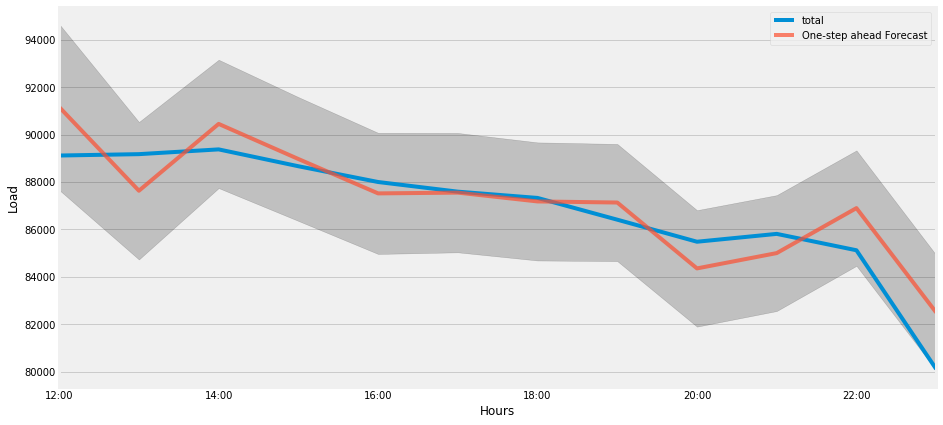

In [171]:
pred = results.get_prediction(start=pd.to_datetime('2015-06-02 12:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = single['2015-06-02 12:00:00':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Hours')
ax.set_ylabel('Load')
plt.legend()
plt.show()

### Complete Data

In [172]:
data.head()

,Datetime,COMED_MW,AEP_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,PJME_MW,PJMW_MW,date,total,average_load
0,06-01-2013 01:00,11378,13477,1682.0,2773,10150,1739,1166,7099,32085,4808,06-01-2013,86357.0,96866.217391
1,06-01-2013 02:00,10584,12699,1568.0,2613,9406,1641,1098,6617,29778,4252,06-01-2013,80256.0,96866.217391
2,06-01-2013 03:00,9973,12274,1514.0,2499,8910,1569,1036,6351,28145,4179,06-01-2013,76450.0,96866.217391
3,06-01-2013 04:00,9451,11904,1467.0,2409,8551,1518,1023,6201,27031,4097,06-01-2013,73652.0,96866.217391
4,06-01-2013 05:00,9184,11862,1456.0,2392,8413,1503,949,6157,26404,3861,06-01-2013,72181.0,96866.217391


array(['06-01-2013', '07-01-2013', '08-01-2013', ..., '03-31-2018',
       '05-31-2018', '07-31-2018'], dtype=object)

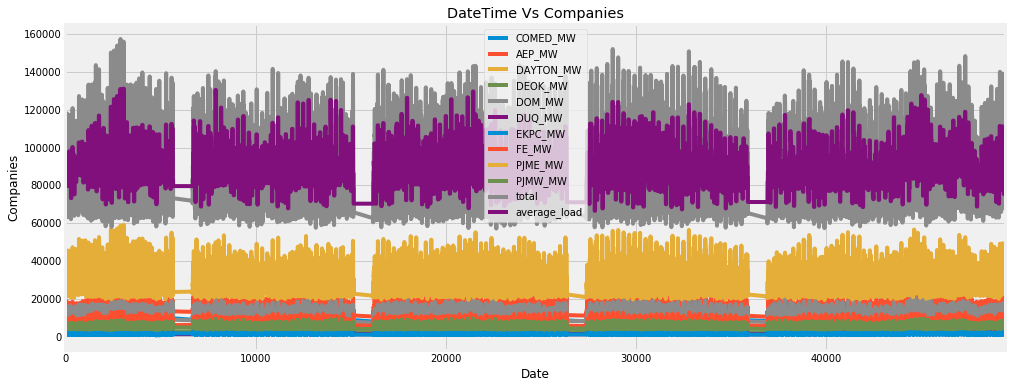

In [175]:
data.shape

(45329, 14)

### Season

In [177]:
finish = final[["date1","average_load_monthly"]]

In [178]:
final = final.rename({'index':'sno'},axis=1)

In [179]:
finish.head()

,date1,average_load_monthly
0,06-2013,93083.893357
1,09-2013,86189.201389
2,11-2013,87380.081884
3,07-2013,104481.587366
4,08-2013,95767.965054


In [180]:
finish1 = finish["date1"].str.split("-", n = 1, expand = True)

In [181]:
finish1['average_load_monthly'] = finish['average_load_monthly'] 

In [182]:
finish1 = finish1.rename({0:'month'},axis=1)

In [183]:
finish1= finish1.set_index('month')

## Summer 

In [184]:
df_summer = finish1[finish1.index.isin(['03','04','05','06'])]

In [185]:
df_summer = df_summer.reset_index()

In [186]:
df_summer['date'] = df_summer[['month', 1]].apply(lambda x: '-'.join(x), axis=1)

In [187]:
df_summer.drop(['month', 1], axis=1, inplace=True)

In [188]:
df_summer.head()

,average_load_monthly,date
0,93083.893357,06-2013
1,79001.398611,04-2014
2,94123.608333,06-2014
3,93342.677770,03-2014
4,80566.436828,05-2014


In [189]:
df_summer1 = df_summer["date"].str.split("-", n = 1, expand = True)

In [190]:
df_summer['year'] = df_summer1[1]

In [191]:
df_summer['average_load_summer'] = df_summer.year.map(df_summer.groupby(['year']).average_load_monthly.mean())

In [192]:
df_summer.drop(['average_load_monthly', 'date'], axis=1, inplace=True)

In [193]:
df_sum  =df_summer.drop_duplicates()

In [194]:
df_sum['Year'] =pd.to_datetime(df_sum['year'])

In [195]:
del df_sum['year']

In [196]:
summ =df_sum.set_index('Year')

In [197]:
summ

,average_load_summer
Year,
2013-01-01,93083.893357
2014-01-01,86758.530386
2015-01-01,86474.096776
2016-01-01,83136.281734
2017-01-01,84092.634597
2018-01-01,87095.009681


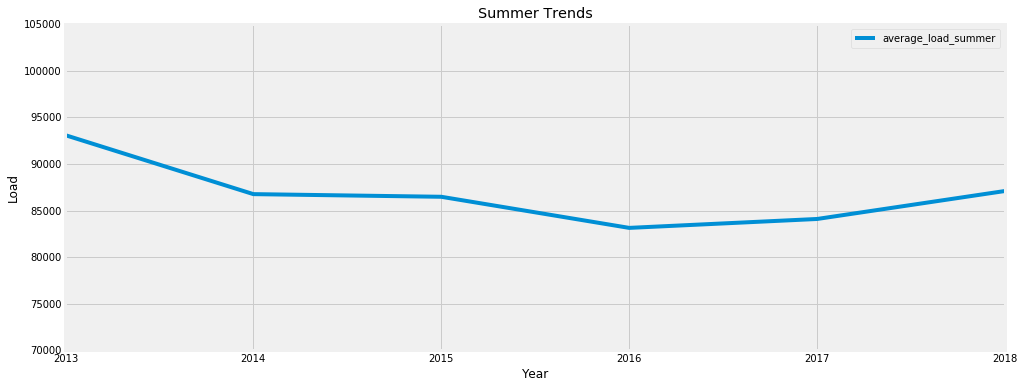

In [198]:
summ.plot(figsize=(15, 6),ylim=(70000,105000))
plt.title('Summer Trends')
plt.xlabel("Year")
plt.ylabel('Load')
plt.show()

In [199]:
summ

,average_load_summer
Year,
2013-01-01,93083.893357
2014-01-01,86758.530386
2015-01-01,86474.096776
2016-01-01,83136.281734
2017-01-01,84092.634597
2018-01-01,87095.009681


In [200]:
import itertools
#finding best p d q values
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [201]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(summ,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:129.7574248801135
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7686.574991845888
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:75.27512744016201
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:59.80738596661119
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:99.026538687081
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:79.31990677826076
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:77.25364750580347
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:64.1353802944556


In [202]:

import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(summ,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.forecast(steps=1)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10          0        inf      0.000       1e-10       1e-10


2019-01-01    87095.009681
Freq: AS-JAN, dtype: float64

In [203]:

#forecasting ahead years 
pred = results.get_prediction(start='2014-01-01',end='2019-01-01',dynamic=False)
pred_ci = pred.conf_int()

a=pred.predicted_mean
new = pd.DataFrame(a,columns=['predicted'])


In [204]:
new

,predicted
2014-01-01,93083.893357
2015-01-01,86758.530386
2016-01-01,86474.096776
2017-01-01,83136.281734
2018-01-01,84092.634597
2019-01-01,87095.009681


In [205]:
sh=pd.concat([summ,new],axis=1)

In [206]:
sh

,average_load_summer,predicted
2013-01-01,93083.893357,NaN
2014-01-01,86758.530386,93083.893357
2015-01-01,86474.096776,86758.530386
2016-01-01,83136.281734,86474.096776
2017-01-01,84092.634597,83136.281734
2018-01-01,87095.009681,84092.634597
2019-01-01,NaN,87095.009681


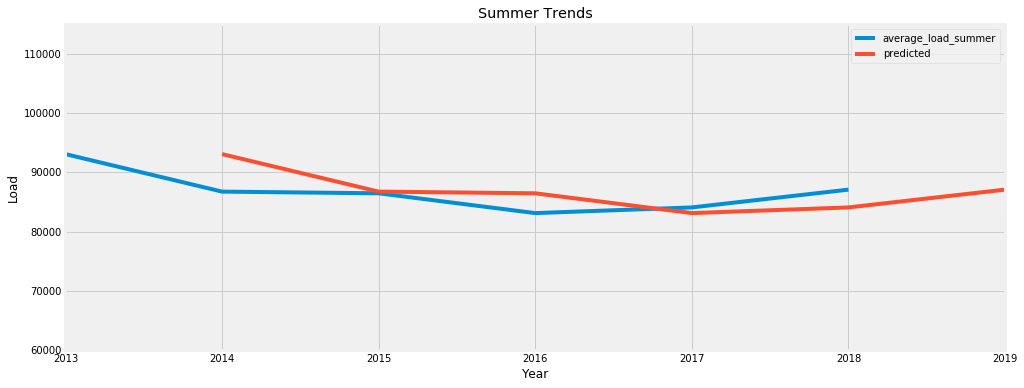

In [207]:
sh.plot(figsize=(15, 6),ylim=(60000,115000))
plt.title('Summer Trends')
plt.xlabel("Year")
plt.ylabel('Load')
plt.show()

In [208]:
mean_absolute_percentage_error(summ,new)

2.605519727686282e-15

## Winter

In [209]:
df_winter = finish1[finish1.index.isin(['11','12','01','02'])]

In [210]:
df_winter = df_winter.reset_index()

In [211]:
df_winter['date'] = df_winter[['month', 1]].apply(lambda x: '-'.join(x), axis=1)

In [212]:
df_winter.drop(['month', 1], axis=1, inplace=True)

In [213]:
df_winter.head()

,average_load_monthly,date
0,87380.081884,11-2013
1,95175.806452,12-2013
2,101719.750000,02-2014
3,88290.537500,11-2014
4,107413.731183,01-2014


In [214]:
df_winter1 = df_winter["date"].str.split("-", n = 1, expand = True)

In [215]:
df_winter['year'] = df_summer1[1]

In [216]:
df_winter['average_load_summer'] = df_winter.year.map(df_winter.groupby(['year']).average_load_monthly.mean())

In [217]:
df_winter.drop(['average_load_monthly', 'date'], axis=1, inplace=True)

In [218]:
df_win  =df_winter.drop_duplicates()

In [219]:
df_win['Year'] =pd.to_datetime(df_win['year'])

In [220]:
del df_win['year']

In [221]:
winn =df_win.set_index('Year')

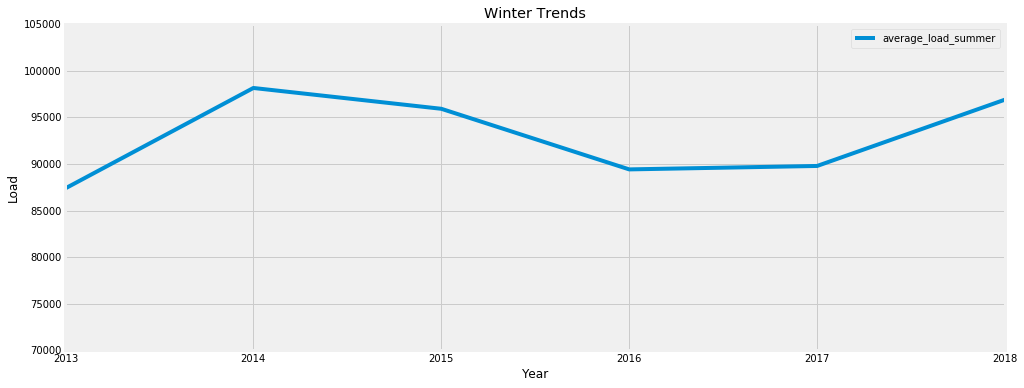

In [222]:
winn.plot(figsize=(15, 6),ylim=(70000,105000))
plt.title('Winter Trends')
plt.xlabel("Year")
plt.ylabel('Load')
plt.show()

In [223]:
import itertools
#finding best p d q values
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [224]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(winn,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:130.7123939125199
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:102.62891817414027
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:81.420424164075
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:62.00289855489589
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:105.71498404546762
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:85.5454702492982
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:83.39093420881774
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:70.4723829237719


In [225]:
#forecasting ahead years 

pred = results.get_prediction(start='2014-01-01',end='2019-01-01',dynamic=False)
pred_ci = pred.conf_int()

a=pred.predicted_mean
new = pd.DataFrame(a,columns=['predicted'])


In [226]:
wh=pd.concat([winn,new],axis=1)
wh

,average_load_summer,predicted
2013-01-01,87380.081884,NaN
2014-01-01,98149.956284,99968.745880
2015-01-01,95916.498962,101479.623423
2016-01-01,89412.960108,95364.170827
2017-01-01,89781.603257,87636.458941
2018-01-01,96901.018401,89852.713842
2019-01-01,NaN,98837.019926


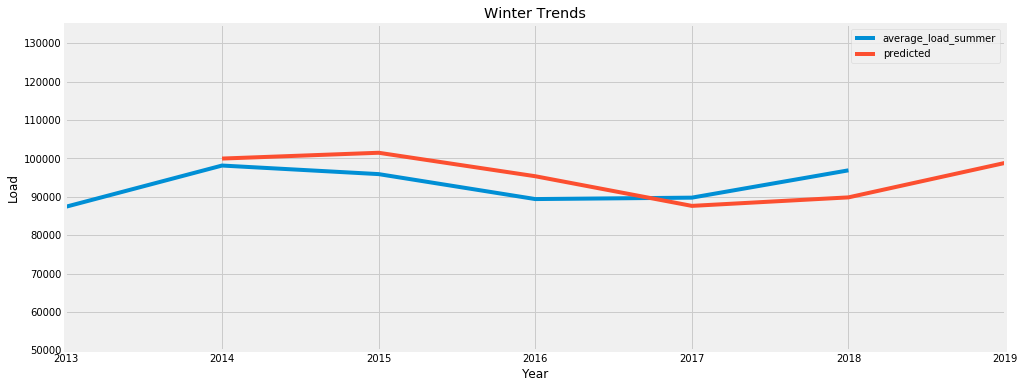

In [227]:
wh.plot(figsize=(15, 6),ylim=(50000,135000))
plt.title('Winter Trends')
plt.xlabel("Year")
plt.ylabel('Load')
plt.show()

In [228]:
mean_absolute_percentage_error(winn,new)

3.7398384147111137